In [1]:
import dask.dataframe as dd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

***EDA***

In [3]:
path = "G:\JaneStreetReal\jane-street-real-time-market-data-forecasting"

In [5]:
train_data = dd.read_parquet(f'{path}\\train.parquet')

In [6]:
sample_df = train_data.sample(frac=10000 / len(train_data), random_state=42)

In [7]:
# Select 10k rows from each partition
def take_n_rows(df, n=10000):
    return df.head(n)

sampled_ddf = train_data.map_partitions(take_n_rows, n=10000)


In [12]:
sampled_ddf.head()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639,0
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000,0


In [14]:
sampled_df = sampled_ddf.compute()

# Save sampled rows back to Parquet
sampled_ddf.to_parquet(r'G:\JaneStreetReal\jane-street-real-time-market-data-forecasting\sample_data\sampled_output.parquet', write_metadata_file=False)

In [15]:
sampled_df.shape

(890000, 93)

In [18]:
sampled_df.describe()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,890000.000000,890000.000000,890000.000000,890000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,890000.000000,...,889776.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,1015.907429,466.582388,18.189901,1.988348,0.550385,0.088156,0.538386,0.541605,0.059103,-0.117767,...,0.038284,-0.002523,0.003701,-0.000445,0.000009,0.003512,-0.001816,0.008101,-0.000138,0.008713
std,434.815660,294.514378,11.295993,1.110074,1.335866,1.116470,1.323256,1.324385,1.073305,1.048588,...,1.036810,0.602109,0.602887,0.620330,0.777033,0.865467,0.648739,0.972245,0.961722,0.980604
min,0.000000,0.000000,0.000000,0.199285,-3.452058,-3.612504,-3.251165,-3.344114,-3.842890,-7.665217,...,-5.352296,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,698.000000,195.000000,9.000000,1.193807,-0.384493,-0.728532,-0.389470,-0.385226,-0.689327,-0.623606,...,-0.299312,-0.200194,-0.175022,-0.210695,-0.321414,-0.386641,-0.232830,-0.412068,-0.442544,-0.358662
50%,1066.000000,465.000000,17.000000,1.735828,0.363774,0.123960,0.359523,0.360863,0.071548,-0.131348,...,-0.187712,-0.005499,-0.022522,-0.001108,-0.025329,-0.044233,-0.008949,-0.028318,-0.047721,-0.009071
75%,1374.000000,733.000000,28.000000,2.488366,1.245599,0.913690,1.251333,1.250255,0.809541,0.333268,...,0.095077,0.188737,0.141638,0.208189,0.277593,0.328631,0.212817,0.360995,0.363422,0.338571
max,1692.000000,967.000000,38.000000,7.933871,4.504366,3.802437,4.487031,4.544008,4.246406,19.784220,...,55.797909,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
sampled_df = dd.read_parquet(f'{path}\\sample_data\\sampled_output.parquet')

**Correlation Matrix**

In [19]:
correlation_matrix = sampled_df.corr()
print(correlation_matrix)

               date_id   time_id  symbol_id    weight  feature_00  feature_01  \
date_id       1.000000  0.072571   0.114677  0.229734    0.418338    0.101557   
time_id       0.072571  1.000000   0.017488  0.031513   -0.097415   -0.348442   
symbol_id     0.114677  0.017488   1.000000 -0.216768    0.009209    0.011486   
weight        0.229734  0.031513  -0.216768  1.000000    0.057817    0.005247   
feature_00    0.418338 -0.097415   0.009209  0.057817    1.000000    0.158680   
...                ...       ...        ...       ...         ...         ...   
responder_5  -0.001200 -0.002844  -0.001944 -0.001560    0.003530   -0.008521   
responder_6   0.011244 -0.013523  -0.000192 -0.008224    0.010616   -0.015694   
responder_7   0.016600 -0.022091   0.005797 -0.012593    0.016393   -0.011369   
responder_8   0.009809 -0.008412  -0.001146 -0.009290    0.008565   -0.009660   
partition_id  0.992993  0.056678   0.114383  0.232762    0.422955    0.117686   

              feature_02  f

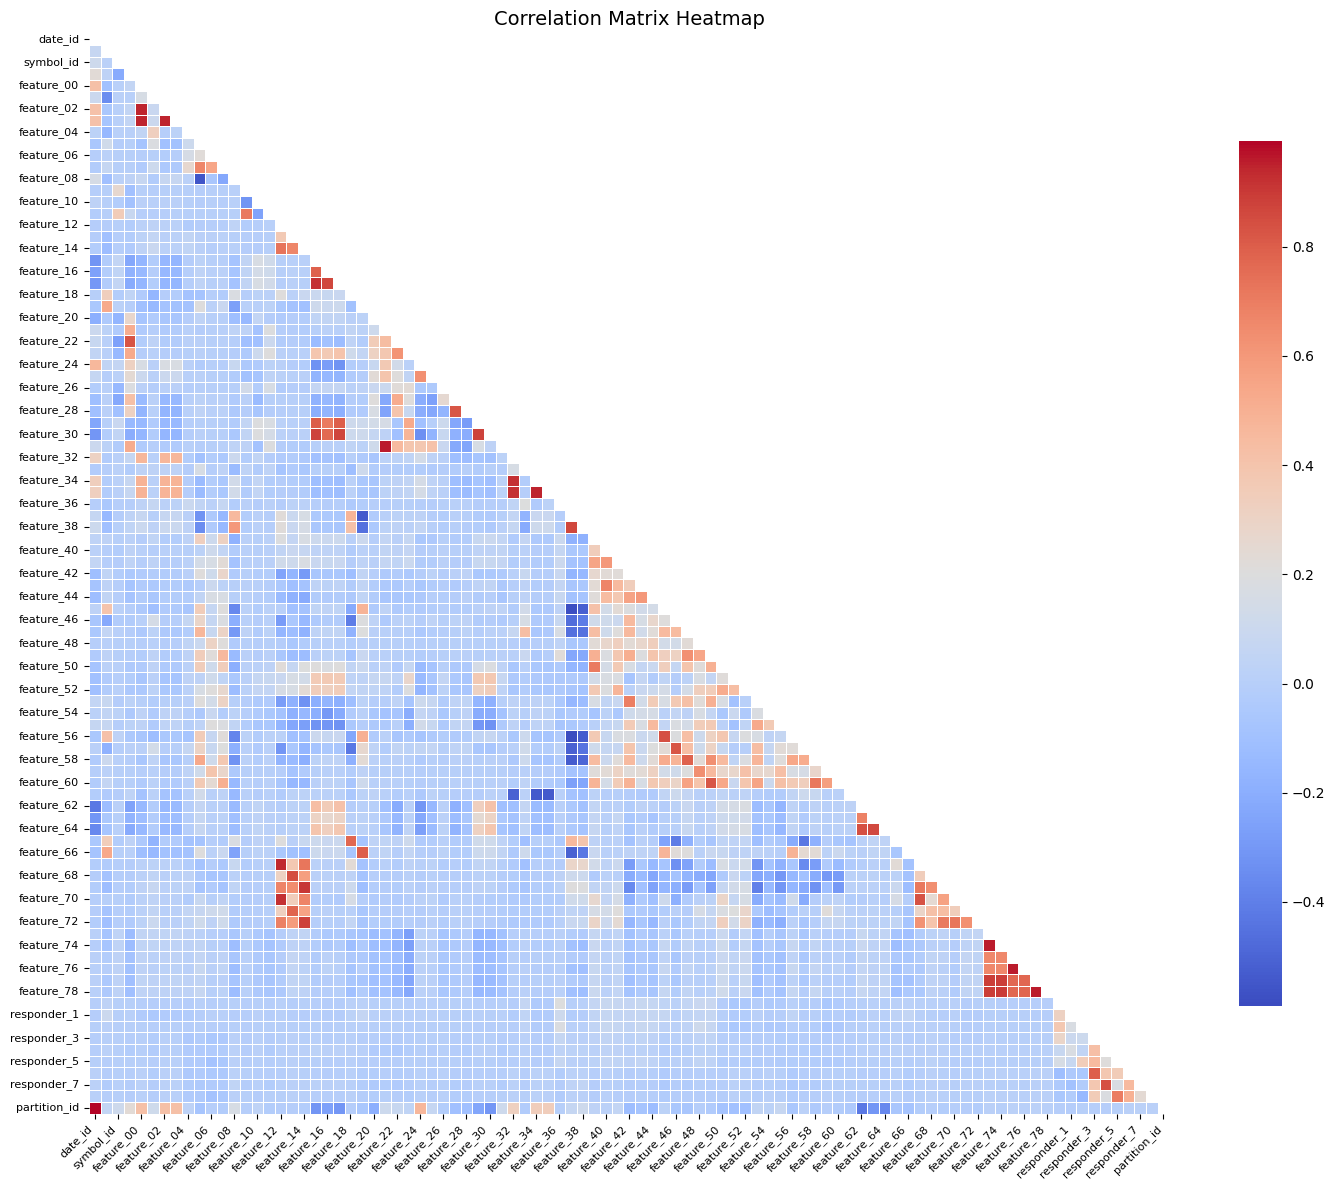

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `correlation_matrix` is your correlation matrix
plt.figure(figsize=(15, 12))  # Increase figure size

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a better heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=False,        # Turn off annotations for large matrices
    cmap="coolwarm",    # Use a better color map
    square=True,        # Make each cell square
    linewidths=0.5,     # Add lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink color bar
)

plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels
plt.yticks(fontsize=8)                           # Adjust y-axis font size
plt.title("Correlation Matrix Heatmap", fontsize=14)  # Add a title
plt.tight_layout()                               # Adjust layout
plt.show()


**RESPONDERS**

In [5]:
import pandas as pd

In [8]:
resp = pd.read_csv(f'{path}\\responders.csv')
resp.tail()

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
4,responder_4,False,False,False,True,True
5,responder_5,False,True,False,False,True
6,responder_6,False,False,True,False,False
7,responder_7,False,False,False,True,False
8,responder_8,False,True,False,False,False


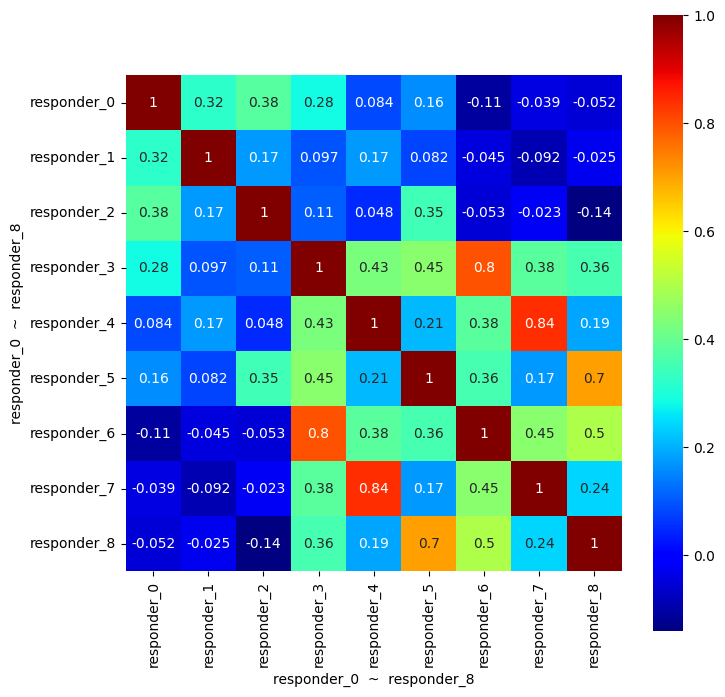

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(sampled_df[[ f"responder_{target}" for target in range(9)]].corr(),  annot=True, square=True, cmap="jet")
plt.xlabel("responder_0  ~  responder_8")
plt.ylabel("responder_0  ~  responder_8")
plt.show()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_0
 - mean  : -0.0025
 - sigma : 0.6021
 - min  : -5.0000
 - max  : 5.0000


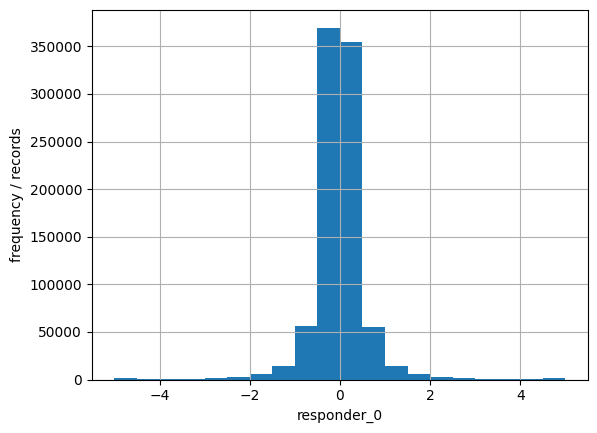

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_1
 - mean  : 0.0037
 - sigma : 0.6029
 - min  : -5.0000
 - max  : 5.0000


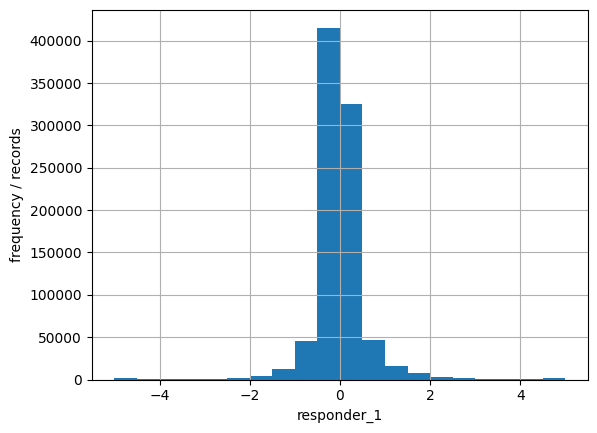

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_2
 - mean  : -0.0004
 - sigma : 0.6203
 - min  : -5.0000
 - max  : 5.0000


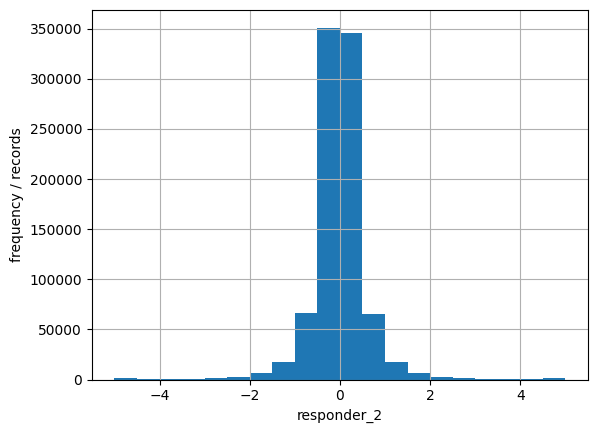

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_3
 - mean  : 0.0000
 - sigma : 0.7770
 - min  : -5.0000
 - max  : 5.0000


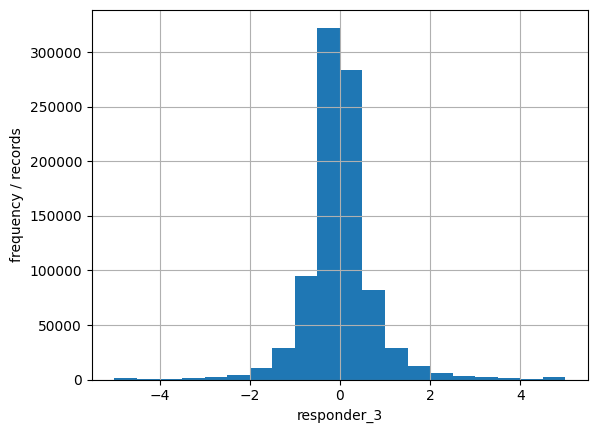

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_4
 - mean  : 0.0035
 - sigma : 0.8655
 - min  : -5.0000
 - max  : 5.0000


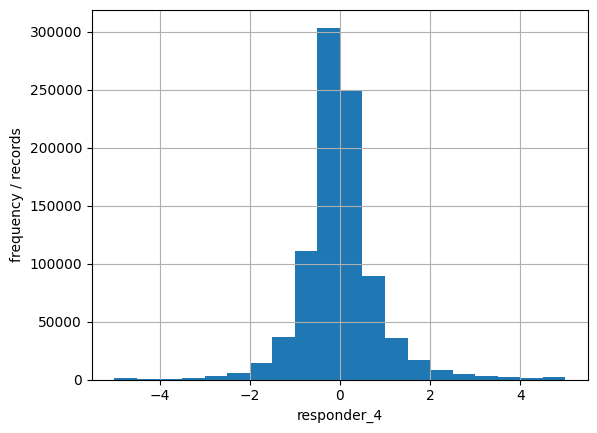

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_5
 - mean  : -0.0018
 - sigma : 0.6487
 - min  : -5.0000
 - max  : 5.0000


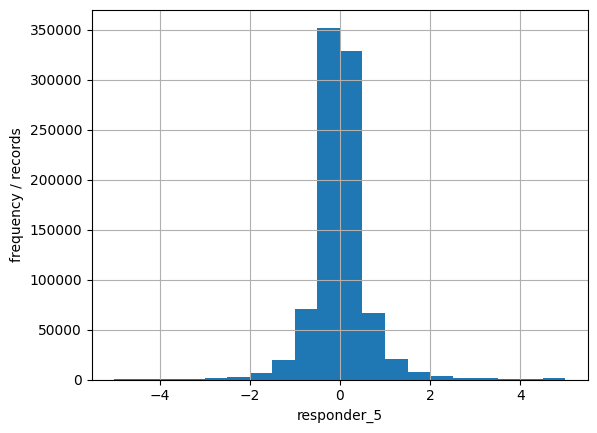

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_6
 - mean  : 0.0081
 - sigma : 0.9722
 - min  : -5.0000
 - max  : 5.0000


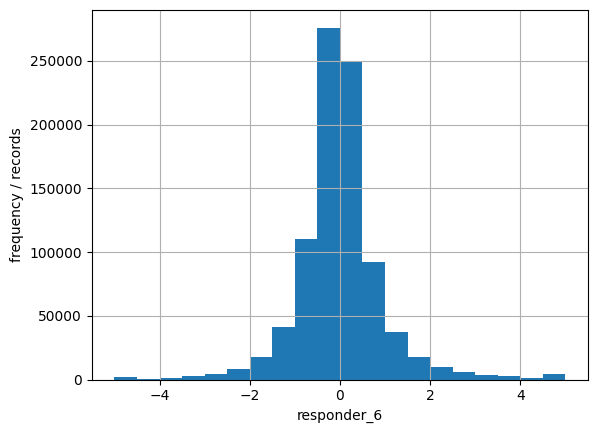

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_7
 - mean  : -0.0001
 - sigma : 0.9617
 - min  : -5.0000
 - max  : 5.0000


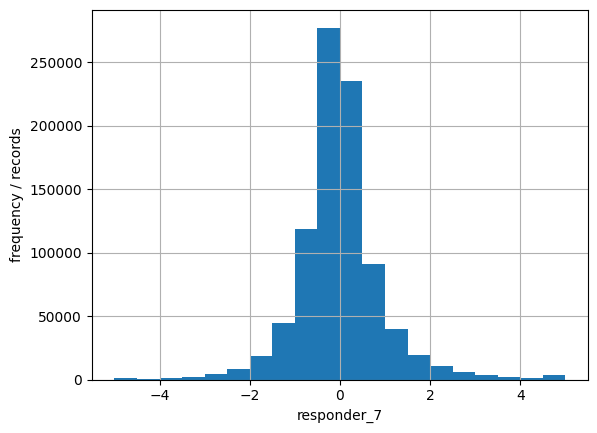

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_8
 - mean  : 0.0087
 - sigma : 0.9806
 - min  : -5.0000
 - max  : 5.0000


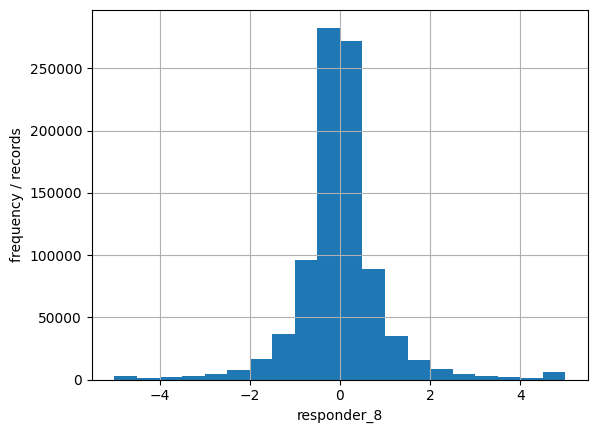

In [25]:
for target in range(9):
    col = f"responder_{target}"
    mean_, sgm_ = sampled_df[col].mean(), np.sqrt(sampled_df[col].var())
    min_, max_ = sampled_df[col].min(), sampled_df[col].max()
    print("- " * 30)
    print( f"column = {col}" )
    print( f" - mean  : {mean_:.4f}",  )
    print( f" - sigma : {sgm_:.4f}",  )
    print( f" - min  : {min_:.4f}",  )
    print( f" - max  : {max_:.4f}",  )
    
    plt.hist(sampled_df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("frequency / records")
    #plt.yscale("log")
    plt.grid()
    plt.show()

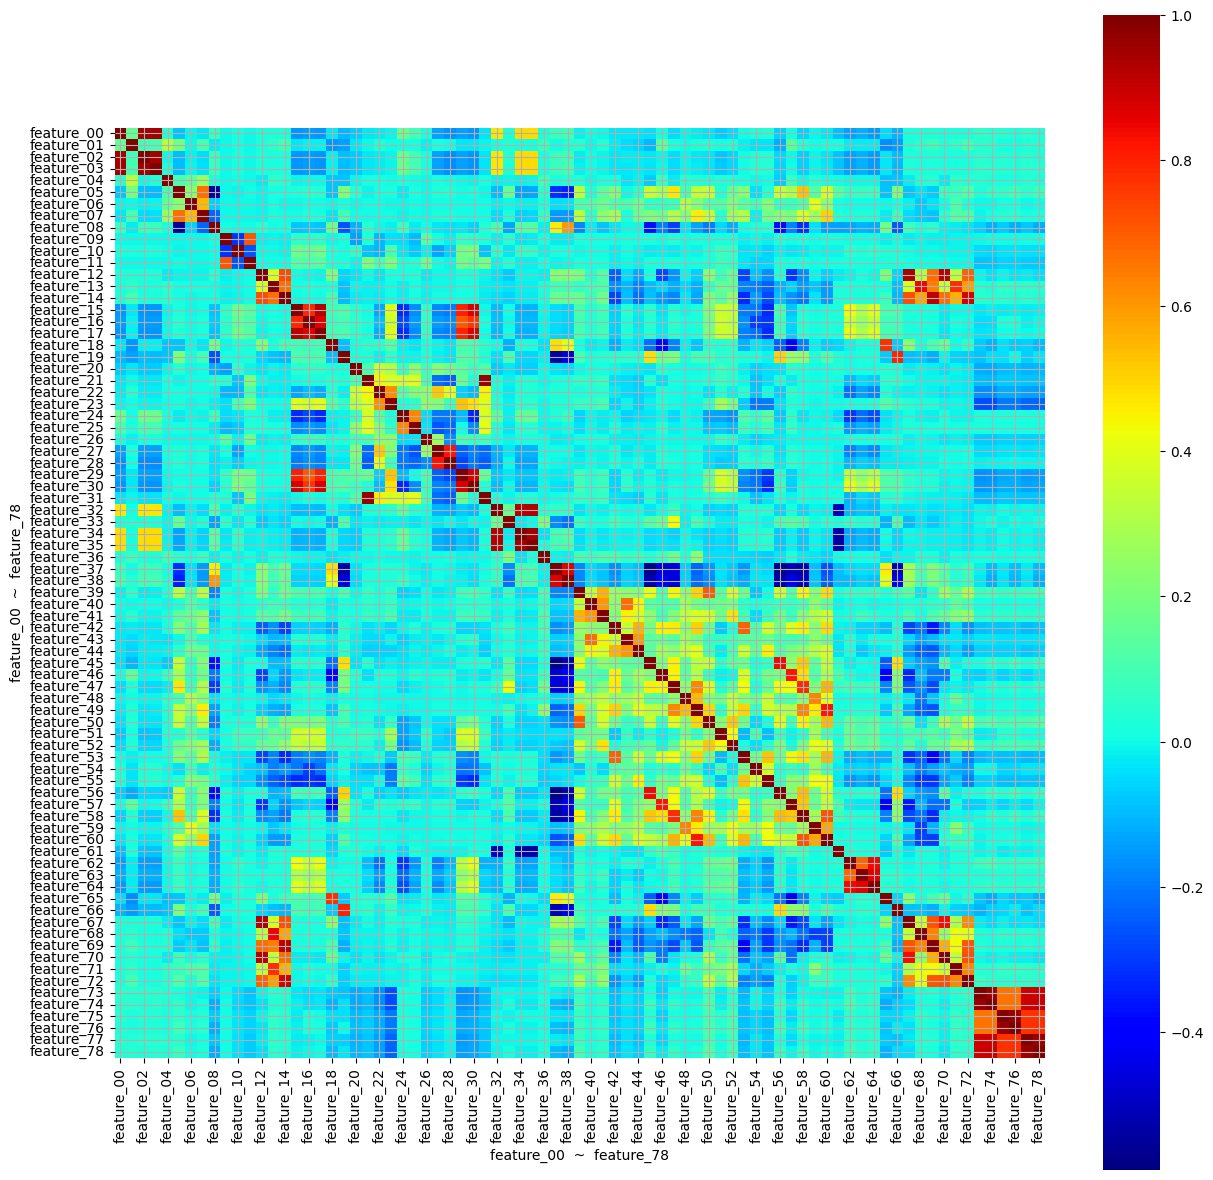

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(sampled_df[[ f"feature_{target:02d}" for target in range(79)]].corr(), square=True, cmap="jet")
plt.xlabel("feature_00  ~  feature_78")
plt.ylabel("feature_00  ~  feature_78")
plt.grid()
plt.show()

**ACF and PACF for responder_6**

In [ ]:
time_series = sampled_df['responder_6']

<Figure size 1000x500 with 0 Axes>

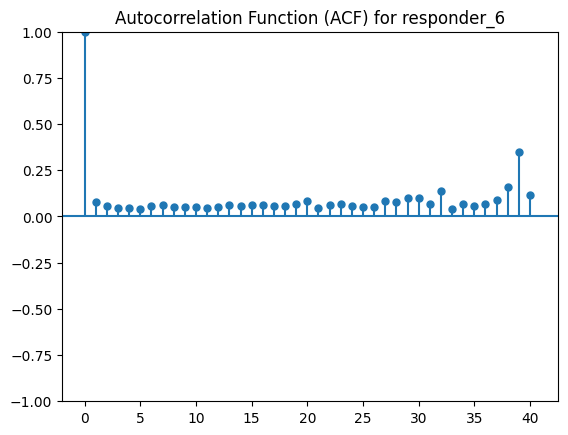

In [33]:
plt.figure(figsize=(10, 5))
plot_acf(time_series, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for responder_6')
plt.show()

<Figure size 1000x500 with 0 Axes>

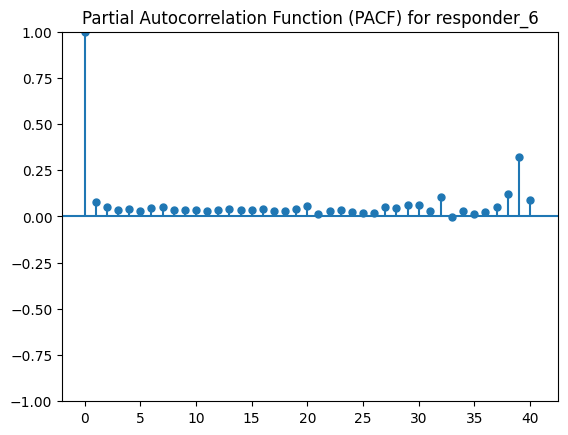

In [34]:
plt.figure(figsize=(10, 5))
plot_pacf(time_series, lags=40, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) for responder_6')
plt.show()

**Feature distribution**

> train.parquet/partition_id=0/part-0.parquet
symbol_id:  0 - 38


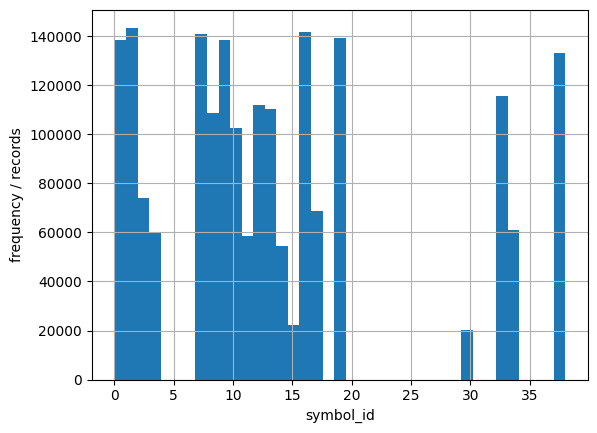

> train.parquet/partition_id=1/part-0.parquet
symbol_id:  0 - 38


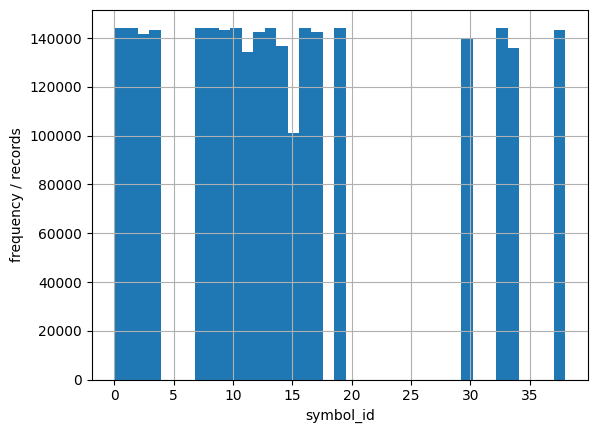

> train.parquet/partition_id=2/part-0.parquet
symbol_id:  0 - 38


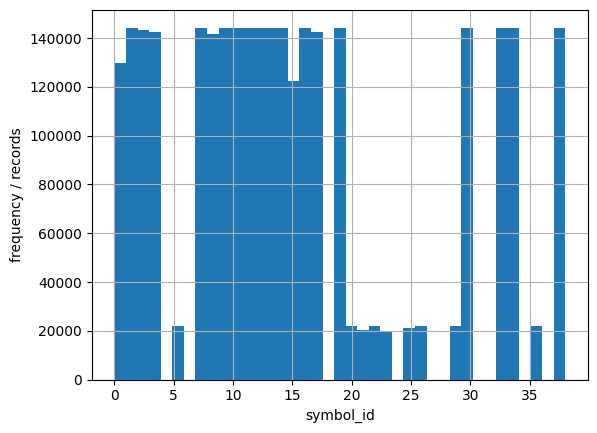

> train.parquet/partition_id=3/part-0.parquet
symbol_id:  0 - 38


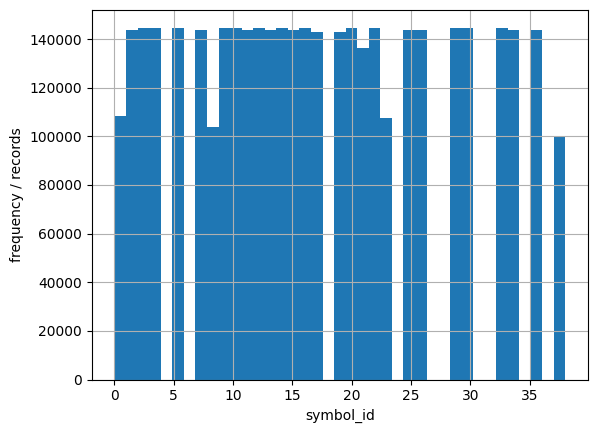

> train.parquet/partition_id=4/part-0.parquet
symbol_id:  0 - 38


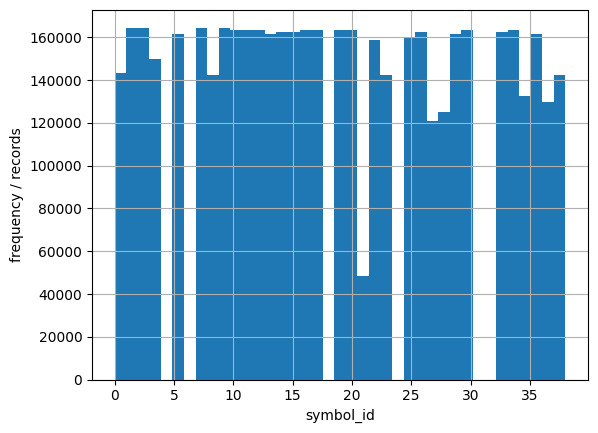

> train.parquet/partition_id=5/part-0.parquet
symbol_id:  0 - 38


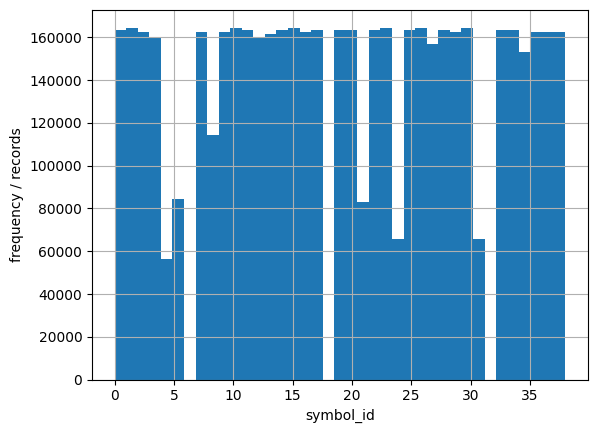

> train.parquet/partition_id=6/part-0.parquet
symbol_id:  0 - 38


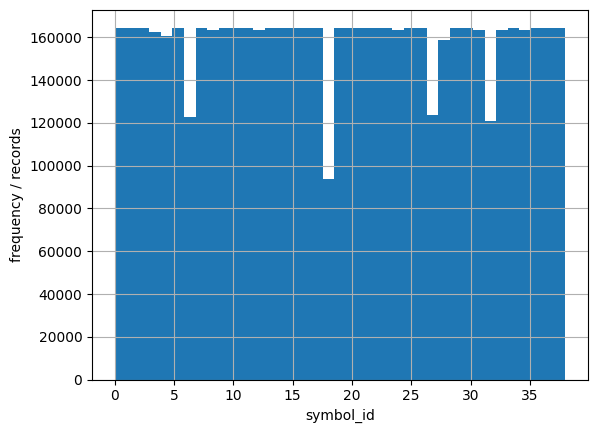

> train.parquet/partition_id=7/part-0.parquet
symbol_id:  0 - 38


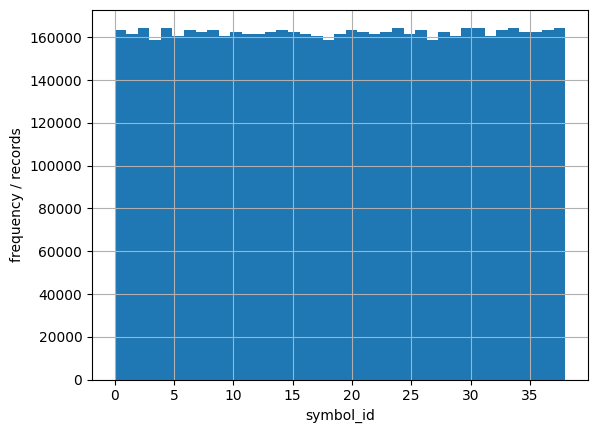

> train.parquet/partition_id=8/part-0.parquet
symbol_id:  0 - 38


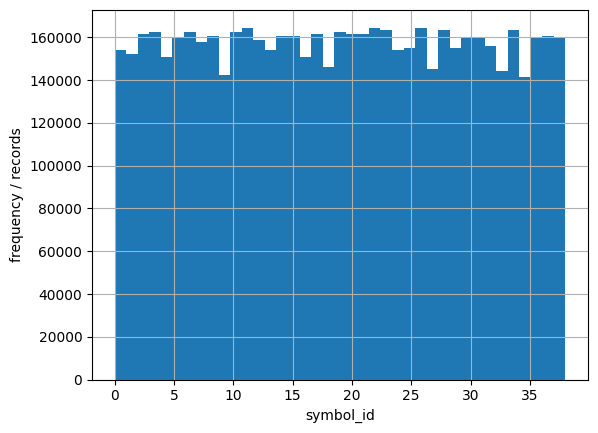

> train.parquet/partition_id=9/part-0.parquet
symbol_id:  0 - 38


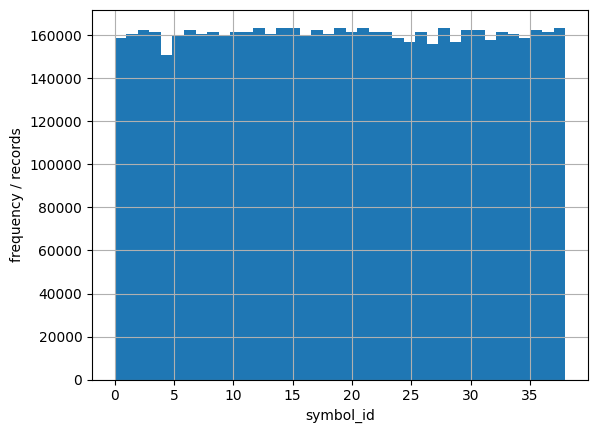

In [ ]:

for partition_id in range(10):
    print(f"> train.parquet/partition_id={partition_id}/part-0.parquet")
    train_data = pl.read_parquet(fr"G:\JaneStreetReal\jane-street-real-time-market-data-forecasting\train.parquet\partition_id={partition_id}\part-0.parquet")

    print( f"symbol_id: ", train_data["symbol_id"].min(), "-", train_data["symbol_id"].max())
    bins = train_data["symbol_id"].max() - train_data["symbol_id"].min() + 1
    plt.hist(train_data["symbol_id"], bins=bins)
    plt.xlabel("symbol_id")
    plt.ylabel("frequency / records")
    plt.grid()
    plt.show()

> train.parquet/partition_id=0/part-0.parquet
date_id:  0 - 169


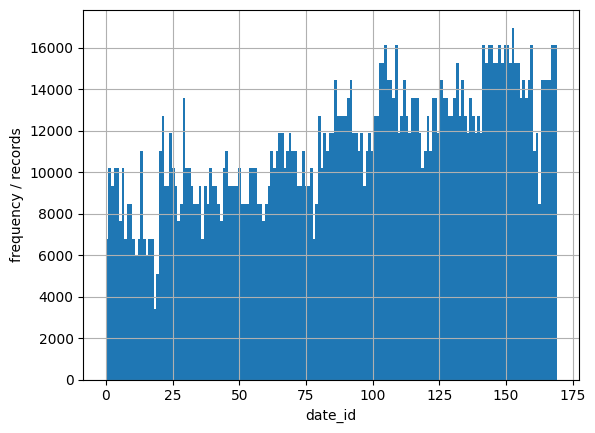

> train.parquet/partition_id=1/part-0.parquet
date_id:  170 - 339


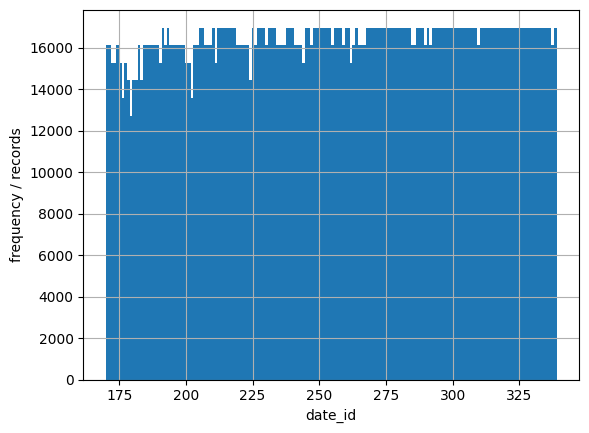

> train.parquet/partition_id=2/part-0.parquet
date_id:  340 - 509


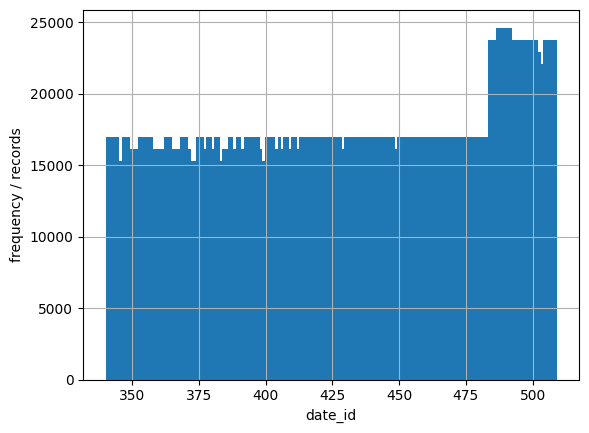

> train.parquet/partition_id=3/part-0.parquet
date_id:  510 - 679


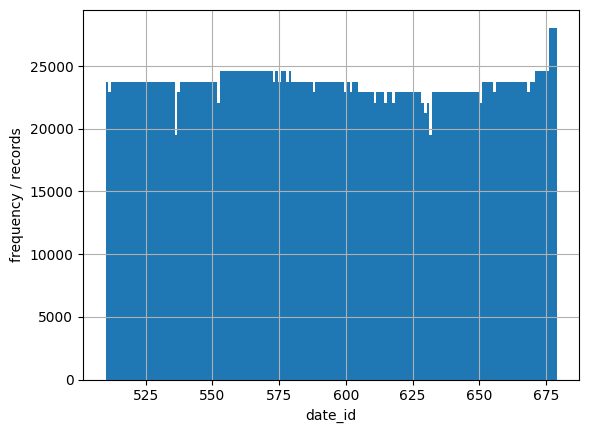

> train.parquet/partition_id=4/part-0.parquet
date_id:  680 - 849


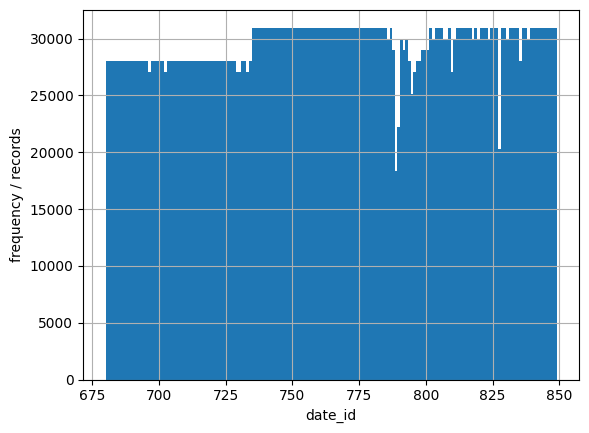

> train.parquet/partition_id=5/part-0.parquet
date_id:  850 - 1019


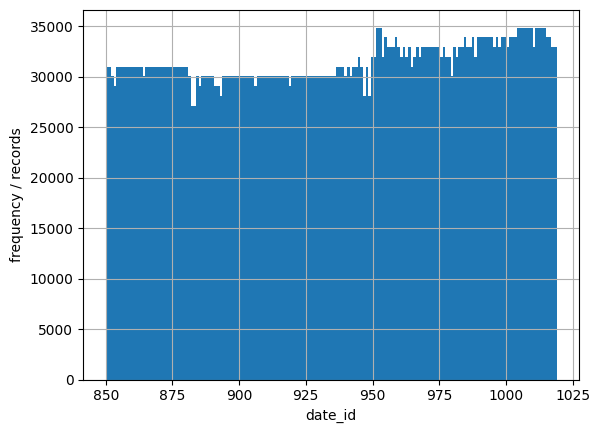

> train.parquet/partition_id=6/part-0.parquet
date_id:  1020 - 1189


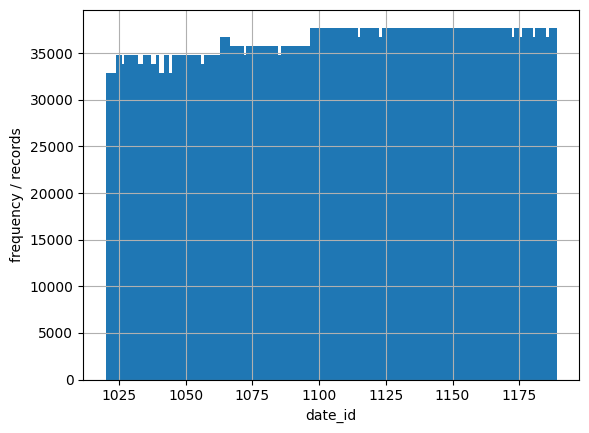

> train.parquet/partition_id=7/part-0.parquet
date_id:  1190 - 1359


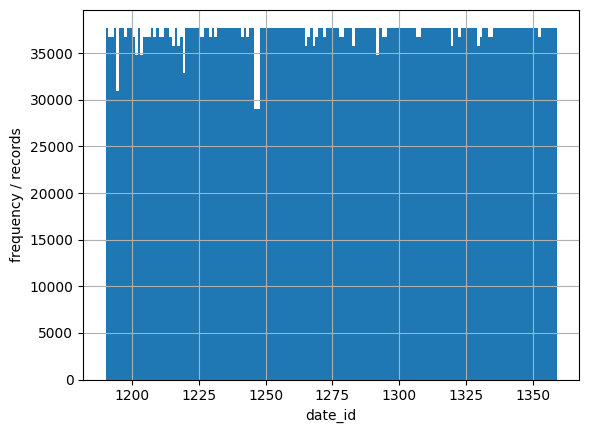

> train.parquet/partition_id=8/part-0.parquet
date_id:  1360 - 1529


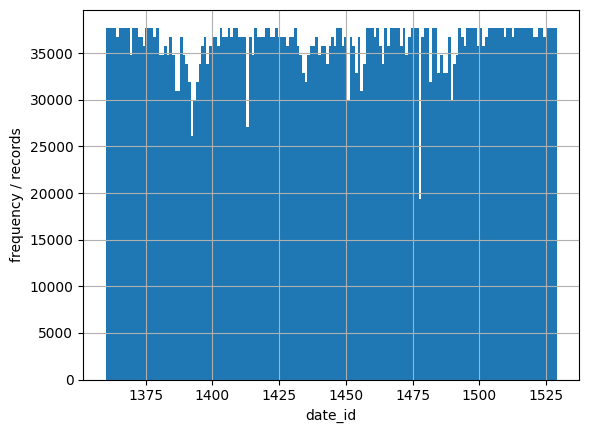

> train.parquet/partition_id=9/part-0.parquet
date_id:  1530 - 1698


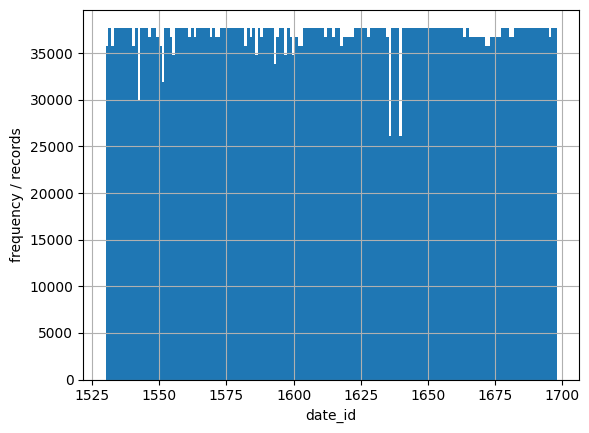

In [38]:
for partition_id in range(10):
    print(f"> train.parquet/partition_id={partition_id}/part-0.parquet")
    train_data = pl.read_parquet(fr"G:\JaneStreetReal\jane-street-real-time-market-data-forecasting\train.parquet\partition_id={partition_id}\part-0.parquet")

    print( f"date_id: ", train_data["date_id"].min(), "-", train_data["date_id"].max())
    bins = train_data["date_id"].max() - train_data["date_id"].min() + 1
    plt.hist(train_data["date_id"], bins=bins)
    plt.xlabel("date_id")
    plt.ylabel("frequency / records")
    plt.grid()
    plt.show()

**Features**

In [12]:
features = pd.read_csv(f'{path}\\features.csv',index_col=0)
features.tail()

,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
feature,,,,,,,,,,,,,,,,,
feature_74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
feature_75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
feature_76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
feature_77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
feature_78,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [13]:
categorical_columns = features[:]
df_categorical = pd.get_dummies(
    data = features ,
    prefix = 'OHE' ,
    prefix_sep = '_' ,
    columns = categorical_columns ,
    dtype = 'int8'
)

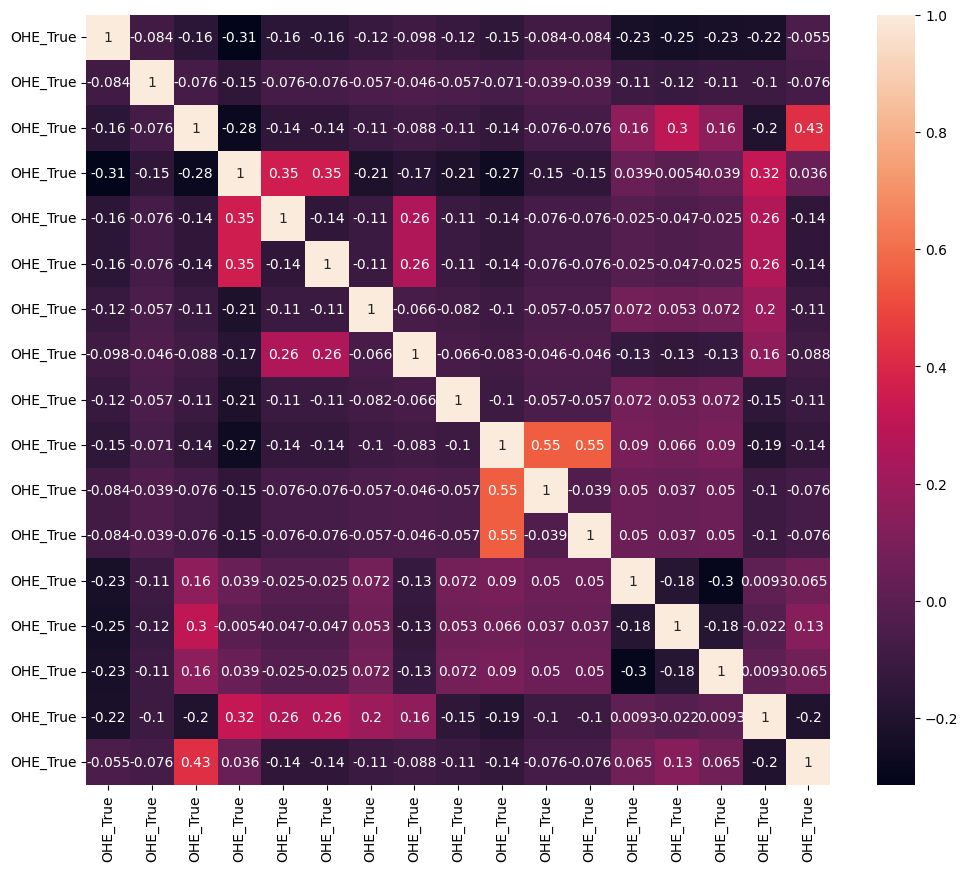

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df_categorical.corr(),annot=True);